Manav 

## Introduction 

In this task we need to run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified linear nonlinearities on the iris dataset using the keras Sequential interface. Then using GridSearchCV with StratifiedShuffle Split we find the regularization strength and the number of hidden layers and use that to evaluate the model on the test set.

The Iris Dataset has samples of three different types of iris flowers (Iris setosa, Iris virginica and Iris versicolor)with varying physical qualities and it consists of the following attributes:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width 

In [1]:
#Importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Importing the IRIS dataset 
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
#Random Seeding 
np.random.RandomState(seed=0)

In [4]:
#Splitting the dataset into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

## Modelling

In [5]:
#IMporting Keras and other required libraries for Sequential interface
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#Making a function for making the model with 2 hidden layers and calculating its accuracy 
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier

def make_model(optimizer='adam', hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_dim = 4),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(3),
        Activation('softmax')
    ])
        
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
#Using KerasClassifier for modelling purpose
clf = KerasClassifier(make_model)

## Using GridSearchCV for Parameter tuning

In [8]:
#Splitting the dataset usingStratifiedShuffle split to use with GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
sss.get_n_splits(X_train, y_train)

1

In [9]:
#GridSearchCV for determining using StratifiedShuffleSplit 
from sklearn.model_selection import GridSearchCV

param_grid = {'epochs' : [1, 3, 5], 'hidden_size':  [10, 32, 64]}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_)

Epoch 1/1
89/89 [==============================] - 0s 39us/step
Epoch 1/1
89/89 [==============================] - 0s 45us/step
Epoch 1/1
90/90 [==============================] - 0s 39us/step
Epoch 1/1
90/90 [==============================] - 0s 39us/step
Epoch 1/1
90/90 [==============================] - 0s 94us/step
Epoch 1/1
89/89 [==============================] - 0s 39us/step
Epoch 1/1
89/89 [==============================] - 0s 79us/step
Epoch 1/1
90/90 [==============================] - 0s 67us/step
Epoch 1/1
90/90 [==============================] - 0s 33us/step
Epoch 1/1
90/90 [==============================] - 0s 67us/step
Epoch 1/1
89/89 [==============================] - 0s 67us/step
Epoch 1/1
89/89 [==============================] - 0s 50us/step
Epoch 1/1
90/90 [==============================] - 0s 50us/step
Epoch 1/1
90/90 [==============================] - 0s 50us/step
Epoch 1/1
90/90 [==============================] - 0s 83us/step
Epoch 1/3
89/89 [=======================

90/90 [==============================] - 2s 19ms/step - loss: 1.2907 - acc: 0.1778
Epoch 2/5
90/90 [==============================] - 0s 105us/step - loss: 1.1554 - acc: 0.3889
Epoch 3/5
90/90 [==============================] - 0s 105us/step - loss: 1.0793 - acc: 0.3889
Epoch 4/5
90/90 [==============================] - 0s 100us/step - loss: 1.0255 - acc: 0.3889
Epoch 5/5
90/90 [==============================] - 0s 68us/step
Epoch 1/5
90/90 [==============================] - 2s 19ms/step - loss: 1.1392 - acc: 0.3889
Epoch 2/5
90/90 [==============================] - 0s 105us/step - loss: 0.9727 - acc: 0.3889
Epoch 3/5
90/90 [==============================] - 0s 100us/step - loss: 0.8732 - acc: 0.5111
Epoch 4/5
90/90 [==============================] - 0s 100us/step - loss: 0.7984 - acc: 0.7333
Epoch 5/5
90/90 [==============================] - 0s 78us/step
Epoch 1/5
112/112 [==============================] - 2s 20ms/step - loss: 1.2147 - acc: 0.3661
Epoch 2/5
112/112 [==================

In [10]:
#Defining the function with the best parmeters obtained from GridSearchCV 
def make_model(optimizer='adam', hidden_size=64):
    model = Sequential([
        Dense(hidden_size, input_dim = 4),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(3),
        Activation('softmax')
    ])        
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
#Since we used categorical_crossentropy as the loss factor we need to convert the target train and test sets from vectors 
#into a matrix 
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
#Fitting the tuned model using GridSearchCV on the train set and printing the model summary 
model = make_model()
model.fit(X_train, y_train,
          epochs=100,
          batch_size=3, validation_split=.1)
print('\nSummary:\n\n')
model.summary()

Train on 100 samples, validate on 12 samples
Epoch 1/100
100/100 [==============================] - 8s 81ms/step - loss: 1.0078 - acc: 0.4600 - val_loss: 0.8995 - val_acc: 0.5833
Epoch 2/100
100/100 [==============================] - 0s 699us/step - loss: 0.7233 - acc: 0.7800 - val_loss: 0.6539 - val_acc: 0.5833
Epoch 3/100
100/100 [==============================] - 0s 674us/step - loss: 0.5702 - acc: 0.7500 - val_loss: 0.6031 - val_acc: 0.5833
Epoch 4/100
100/100 [==============================] - 0s 848us/step - loss: 0.4875 - acc: 0.8100 - val_loss: 0.5537 - val_acc: 0.5833
Epoch 5/100
100/100 [==============================] - 0s 694us/step - loss: 0.4008 - acc: 0.8300 - val_loss: 0.4181 - val_acc: 0.7500
Epoch 6/100
100/100 [==============================] - 0s 699us/step - loss: 0.3588 - acc: 0.8700 - val_loss: 0.2917 - val_acc: 0.9167
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.3117 - acc: 0.8900 - val_loss: 0.3569 - val_acc: 0.8333
Epoch 8/100
1

In [14]:
#Evaluating the tuned model on the test set 
score = model.evaluate(X_test, y_test, batch_size=3, verbose=0)

print("\nTest loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))


Test loss: 0.202
Test Accuracy: 0.947


In [15]:
#Fitting the tuned model on the training set 
history_callback = model.fit(X_train, y_train, batch_size=64,
                             epochs=100, verbose=1, validation_split=.1)

Train on 100 samples, validate on 12 samples
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0255 - acc: 0.9900 - val_loss: 0.2716 - val_acc: 0.9167
Epoch 2/100
100/100 [==============================] - 0s 200us/step - loss: 0.0210 - acc: 0.9900 - val_loss: 0.2453 - val_acc: 0.9167
Epoch 3/100
100/100 [==============================] - 0s 225us/step - loss: 0.0201 - acc: 0.9900 - val_loss: 0.2200 - val_acc: 0.9167
Epoch 4/100
100/100 [==============================] - 0s 180us/step - loss: 0.0198 - acc: 1.0000 - val_loss: 0.1998 - val_acc: 0.9167
Epoch 5/100
100/100 [==============================] - 0s 160us/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.1864 - val_acc: 0.9167
Epoch 6/100
100/100 [==============================] - 0s 130us/step - loss: 0.0201 - acc: 1.0000 - val_loss: 0.1784 - val_acc: 0.9167
Epoch 7/100
100/100 [==============================] - 0s 135us/step - loss: 0.0205 - acc: 1.0000 - val_loss: 0.1754 - val_acc: 0.9167
Epoch 8/100


100/100 [==============================] - 0s 160us/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.2160 - val_acc: 0.9167
Epoch 62/100
100/100 [==============================] - 0s 120us/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.2152 - val_acc: 0.9167
Epoch 63/100
100/100 [==============================] - 0s 100us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 0.2166 - val_acc: 0.9167
Epoch 64/100
100/100 [==============================] - 0s 160us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 0.2183 - val_acc: 0.9167
Epoch 65/100
100/100 [==============================] - 0s 130us/step - loss: 0.0181 - acc: 1.0000 - val_loss: 0.2199 - val_acc: 0.9167
Epoch 66/100
100/100 [==============================] - 0s 140us/step - loss: 0.0181 - acc: 1.0000 - val_loss: 0.2223 - val_acc: 0.9167
Epoch 67/100
100/100 [==============================] - 0s 135us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 0.2238 - val_acc: 0.9167
Epoch 68/100
100/100 [==============================] - 0s 14

## Visualization

In [16]:
#Making a function to plot both the models accuracy and loss 
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

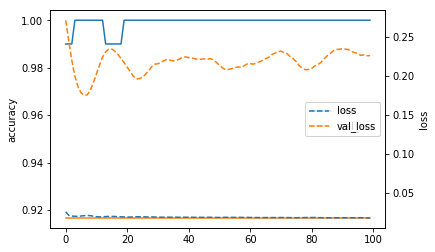

In [17]:
#Accuracy and Loss v/s epochs
plot_history(history_callback)
plt.show()